In [82]:
# 포폴에도 Seaborn 쓴거 있어야 해요
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
school_df = pd.read_csv("../../Data/study/2007~2022유치원_대학_사설학원.csv",index_col=0)
school_df.head()

,시점,지역,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자
0,2007,경기도,15591,61,489548,951908,411732,135245,485552
1,2007,서울특별시,11549,50,375937,665227,355193,82461,541288
2,2007,경상남도,5844,19,138629,264776,137276,44188,139584
3,2007,부산광역시,4779,22,144991,242193,106501,37921,265238
4,2007,대구광역시,2929,11,113962,199471,105396,27908,124318


In [3]:
el_school = pd.read_excel("../../Data/study/초등학교수.xlsx")
el_school.drop(columns="설립주체별(1)",inplace=True)

In [4]:
el_school.rename(columns={"시도별(1)":"시도"},inplace=True)

In [5]:
el_school = el_school.iloc[1:,:]
el_school

,시도,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,서울,597,599,599,601,603,603,607,607,607,609
2,부산,302,305,306,308,308,305,304,304,304,304
3,대구,219,220,221,225,228,229,229,230,232,233
4,인천,240,242,243,247,249,249,250,253,258,260
5,광주,149,150,153,153,154,154,155,155,155,155
6,대전,143,143,146,146,147,148,148,148,148,149
7,울산,118,119,119,117,118,117,119,120,121,121
8,세종,22,26,35,37,43,47,48,49,51,52
9,경기,1187,1195,1213,1227,1241,1261,1277,1298,1317,1320
10,강원,351,351,351,351,351,351,349,347,348,349


In [6]:
el_school.set_index("시도",inplace=True)

In [7]:
el_school_T = el_school.T

In [8]:
el_school_T

시도,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2013,597,302,219,240,149,143,118,22,1187,351,259,406,414,426,477,493,110
2014,599,305,220,242,150,143,119,26,1195,351,259,405,414,424,478,493,111
2015,599,306,221,243,153,146,119,35,1213,351,260,405,415,426,476,498,112
2016,601,308,225,247,153,146,117,37,1227,351,260,405,416,427,469,500,112
2017,603,308,228,249,154,147,118,43,1241,351,259,407,419,430,468,503,112
2018,603,305,229,249,154,148,117,47,1261,351,258,409,419,429,470,502,113
2019,607,304,229,250,155,148,119,48,1277,349,259,409,419,429,471,501,113
2020,607,304,230,253,155,148,120,49,1298,347,258,410,421,429,473,505,113
2021,607,304,232,258,155,148,121,51,1317,348,259,412,420,430,473,509,113
2022,609,304,233,260,155,149,121,52,1320,349,256,411,421,426,473,510,114


In [9]:
el_school_T.astype(int).info()
el_school_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2013 to 2022
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      10 non-null     int64
 1   부산      10 non-null     int64
 2   대구      10 non-null     int64
 3   인천      10 non-null     int64
 4   광주      10 non-null     int64
 5   대전      10 non-null     int64
 6   울산      10 non-null     int64
 7   세종      10 non-null     int64
 8   경기      10 non-null     int64
 9   강원      10 non-null     int64
 10  충북      10 non-null     int64
 11  충남      10 non-null     int64
 12  전북      10 non-null     int64
 13  전남      10 non-null     int64
 14  경북      10 non-null     int64
 15  경남      10 non-null     int64
 16  제주      10 non-null     int64
dtypes: int64(17)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2013 to 2022
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서울      10 n

In [10]:
el_school_T.rename(columns={"경기":"경기도","서울":"서울특별시","경남":"경상남도","인천":"인천광역시","부산":"부산광역시","경북":"경상북도",
	"대구":"대구광역시","충남":"충청남도","전북":"전라북도","전남":"전라남도","광주":"광주광역시","충북":"충청북도","대전":"대전광역시",
	"강원":"강원도","울산":"울산광역시","제주":"제주특별자치도","세종":"세종특별자치시"},inplace=True)


In [11]:
el_school_T.iloc[0,:]

시도
서울특별시       597
부산광역시       302
대구광역시       219
인천광역시       240
광주광역시       149
대전광역시       143
울산광역시       118
세종특별자치시      22
경기도        1187
강원도         351
충청북도        259
충청남도        406
전라북도        414
전라남도        426
경상북도        477
경상남도        493
제주특별자치도     110
Name: 2013, dtype: object

In [12]:
test = [] # (10, 17) 년도,지방
sid = []
sido = []
num = 0
tom = 0
for t in range(10): # 17번 년도 넣는걸껄
    for _ in range(17): # 10번
        test.append(el_school_T.index[num])
    num+=1

for t in range(17): # 17번 # 지방 수 만큼
    sid.append(el_school_T.columns[t])
sido.append(sid *10) # 전국 시군구를 2000~2022에 맞춰 23번 곱해 리스트를 만듦.
years = []
f = 0
for _ in range(10):
        for k in range(17):
            years.append(el_school_T.iloc[0,:][k]) # 지역별 값
        f+=1

In [13]:
# row수 확인.
print(len(test))
print(len(sido[0]))
print(len(years))

170
170
170


In [14]:
elementarySchool_SU = pd.DataFrame(
    {'시점':test,
    '지역':sido[0],
    '초등학교수':years
    }
)
elementarySchool_SU

,시점,지역,초등학교수
0,2013,서울특별시,597
1,2013,부산광역시,302
2,2013,대구광역시,219
3,2013,인천광역시,240
4,2013,광주광역시,149
...,...,...,...
165,2022,전라북도,414
166,2022,전라남도,426
167,2022,경상북도,477
168,2022,경상남도,493


In [15]:
elementarySchool_SU.시점 = elementarySchool_SU.시점.astype(int)

In [16]:
from sklearn.cluster import KMeans

In [17]:
school_df = school_df[(school_df["시점"]>2012) & (school_df['시점']<2021)]
school_df.shape

(136, 9)

In [18]:
elementarySchool_SU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시점      170 non-null    int64 
 1   지역      170 non-null    object
 2   초등학교수   170 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


In [19]:
elementarySchool_SU = elementarySchool_SU[elementarySchool_SU['시점']<2021]

In [259]:
test = pd.read_csv("../../Data/00.통합.csv")
test.columns

Index(['년도', '시도', '사설학원수', '대학교_숫자', '중학생인원수변화', '초등학생인원수변화', '고등학생인원수변화',
       '유치원원아수변화', '대학생숫자', '의원', '병원', '종합병원', '상급종합병원', '의사', '치과의사', '한의사',
       '약사', '간호사', '기타보건의료인', '주택수', '빈집수', '자동차등록대수', '전입인구', '전출인구', '활동',
       '신생', '소멸', '상용_월평균_임금', '임금상승률', '협회 및 단체, 수리 및 기타 개인서비스업_활동',
       '협회 및 단체, 수리 및 기타 개인서비스업_신생', '협회 및 단체, 수리 및 기타 개인서비스업_소멸',
       '예술, 스포츠 및 여가관련 서비스업_활동', '예술, 스포츠 및 여가관련 서비스업_신생',
       '예술, 스포츠 및 여가관련 서비스업_소멸', '보건업 및 사회복지 서비스업_활동', '보건업 및 사회복지 서비스업_신생',
       '보건업 및 사회복지 서비스업_소멸', '교육서비스업_활동', '교육서비스업_신생', '교육서비스업_소멸',
       '사업 시설관리, 사업지원 및 임대 서비스업_활동', '사업 시설관리, 사업지원 및 임대 서비스업_신생',
       '사업 시설관리, 사업지원 및 임대 서비스업_소멸', '전문, 과학 및 기술서비스업_활동',
       '전문, 과학 및 기술서비스업_신생', '전문, 과학 및 기술서비스업_소멸', '부동산업_활동', '부동산업_신생',
       '부동산업_소멸', '금융 및 보험업_활동', '금융 및 보험업_신생', '금융 및 보험업_소멸', '정보통신업_활동',
       '정보통신업_신생', '정보통신업_소멸', '숙박 및 음식점업_활동', '숙박 및 음식점업_신생', '숙박 및 음식점업_소멸',
       '운수 및 창고업_활동', '운수 및 창고업_신생', '운수 및 창고업_소멸', '도매 및 소매업_활동',
     

In [23]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

9


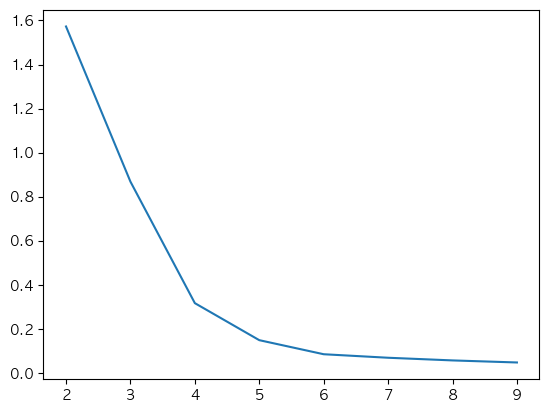

In [263]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = test[['초등학생인원수변화', '전출인구']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)
scores = []
for k in range(2,10):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(data_scale)
    scores.append(km.inertia_)
print(k)
plt.plot(range(2,10),scores)
plt.show()

In [264]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)
print(k)
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
test['cluster'] = model.fit_predict(data_scale)

4


In [265]:
test.cluster.unique()

array([1, 2, 3, 0], dtype=int32)

In [266]:
plt.figure(figsize=(10,10))
sns.heatmap(
    test.loc[:,"사설학원수":"초등학교수"].corr(),
    annot= True,
    fmt= 'f',
    linewidths= 0.5,

)
plt.title("교육이 인구변화에 미치는 영향력")
plt.show()

KeyError: '초등학교수'

<Figure size 1000x1000 with 0 Axes>

4


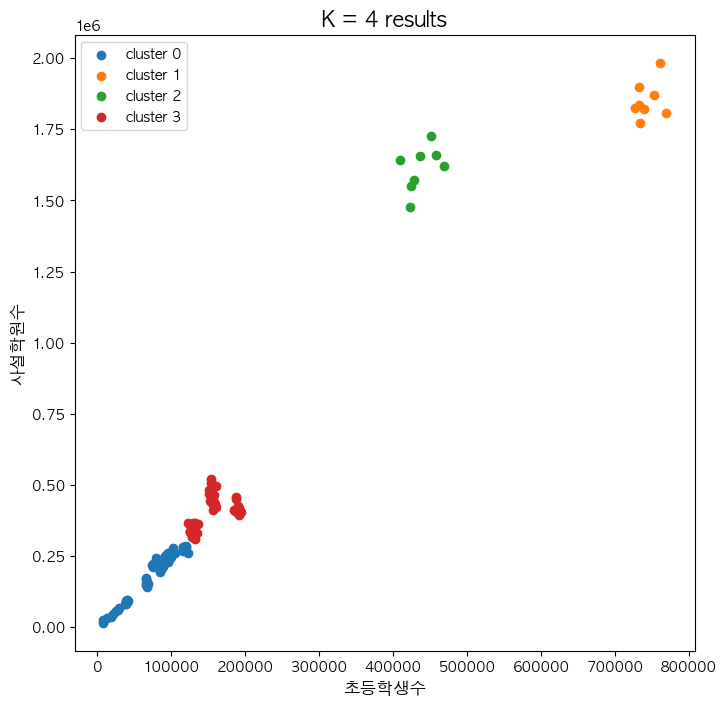

In [268]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(test.loc[test['cluster'] == i, '초등학생인원수변화'], test.loc[test['cluster'] == i, '전출인구'], 
                label = 'cluster ' + str(i))
print(k)
plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('초등학생수', size = 12)
plt.ylabel('사설학원수', size = 12)
plt.show()

In [269]:
test.columns

Index(['년도', '시도', '사설학원수', '대학교_숫자', '중학생인원수변화', '초등학생인원수변화', '고등학생인원수변화',
       '유치원원아수변화', '대학생숫자', '의원', '병원', '종합병원', '상급종합병원', '의사', '치과의사', '한의사',
       '약사', '간호사', '기타보건의료인', '주택수', '빈집수', '자동차등록대수', '전입인구', '전출인구', '활동',
       '신생', '소멸', '상용_월평균_임금', '임금상승률', '협회 및 단체, 수리 및 기타 개인서비스업_활동',
       '협회 및 단체, 수리 및 기타 개인서비스업_신생', '협회 및 단체, 수리 및 기타 개인서비스업_소멸',
       '예술, 스포츠 및 여가관련 서비스업_활동', '예술, 스포츠 및 여가관련 서비스업_신생',
       '예술, 스포츠 및 여가관련 서비스업_소멸', '보건업 및 사회복지 서비스업_활동', '보건업 및 사회복지 서비스업_신생',
       '보건업 및 사회복지 서비스업_소멸', '교육서비스업_활동', '교육서비스업_신생', '교육서비스업_소멸',
       '사업 시설관리, 사업지원 및 임대 서비스업_활동', '사업 시설관리, 사업지원 및 임대 서비스업_신생',
       '사업 시설관리, 사업지원 및 임대 서비스업_소멸', '전문, 과학 및 기술서비스업_활동',
       '전문, 과학 및 기술서비스업_신생', '전문, 과학 및 기술서비스업_소멸', '부동산업_활동', '부동산업_신생',
       '부동산업_소멸', '금융 및 보험업_활동', '금융 및 보험업_신생', '금융 및 보험업_소멸', '정보통신업_활동',
       '정보통신업_신생', '정보통신업_소멸', '숙박 및 음식점업_활동', '숙박 및 음식점업_신생', '숙박 및 음식점업_소멸',
       '운수 및 창고업_활동', '운수 및 창고업_신생', '운수 및 창고업_소멸', '도매 및 소매업_활동',
     

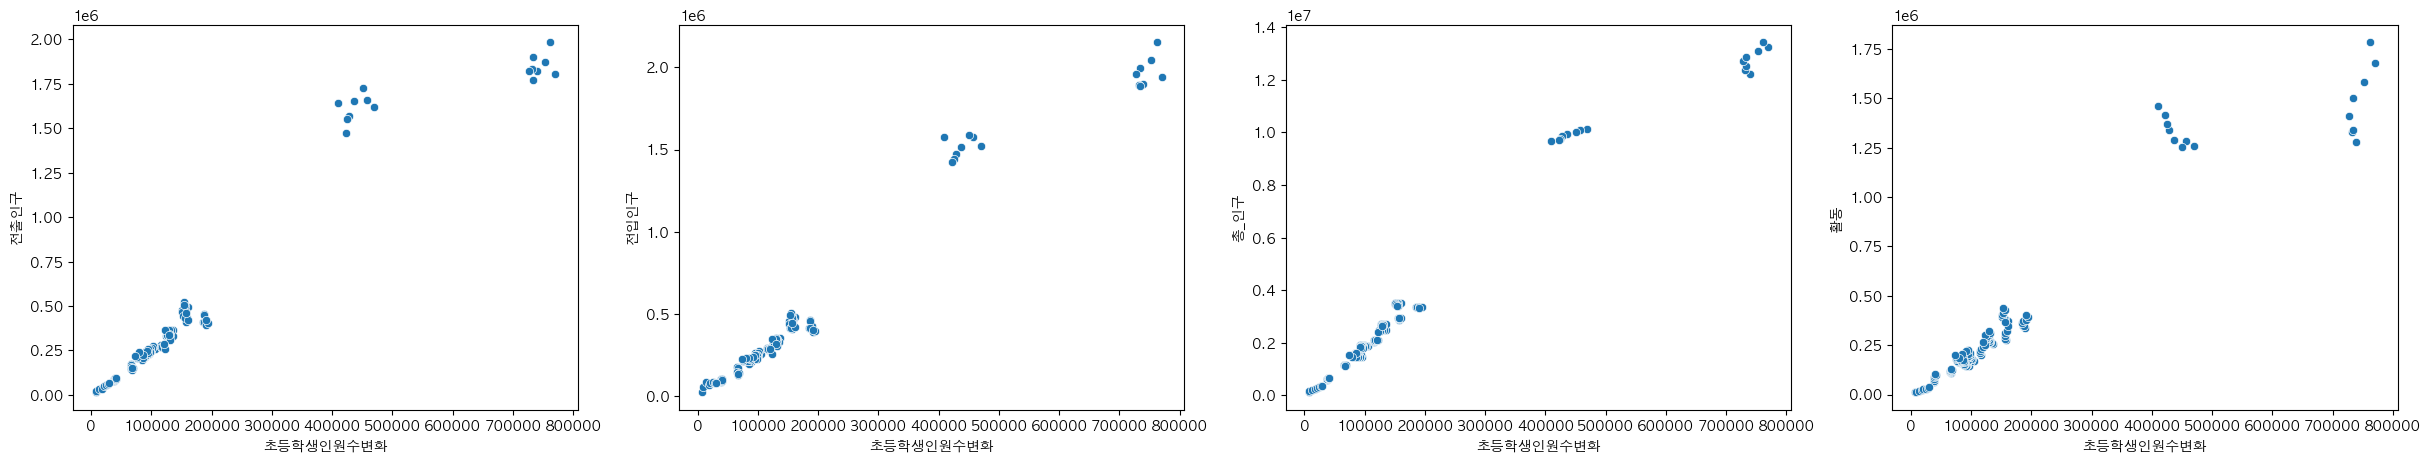

In [270]:
# plt.figure(figsize=(25,15))
fig, ax = plt.subplots(ncols=4,figsize=(30,5))
sns.scatterplot("초등학생인원수변화", "전출인구", data=test, ax=ax[0])
# 초등학생수
sns.scatterplot("초등학생인원수변화", "전입인구", data=test, ax=ax[1])
sns.scatterplot("초등학생인원수변화", "총_인구", data=test, ax=ax[2])
sns.scatterplot("초등학생인원수변화", "활동", data=test, ax=ax[3])
plt.show()

In [275]:
ob = pd.read_csv("../../Data/public health/obgyn.csv")
ob13 = ob[(ob["시점"]>2012) & (ob["시점"]<2021)]
ob13.rename(columns={"시도별":"시도","시점":"년도"},inplace=True)

,시도,년도,산부인과,소아청소년과
113,서울특별시,2013,395,523
114,부산광역시,2013,82,157
115,대구광역시,2013,86,114
116,인천광역시,2013,69,137
117,광주광역시,2013,45,58
...,...,...,...,...
244,전라북도,2020,48,68
245,전라남도,2020,18,25
246,경상북도,2020,53,73
247,경상남도,2020,59,98


In [291]:

ob13.replace("제주도","제주특별자치도",inplace=True)
ob13.시도.unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [282]:
test.shape

(136, 93)

In [292]:
obtest = pd.merge(test,ob13,on=["시도","년도"])
obtest.shape

(136, 95)

In [299]:
obtest.loc[:,["초등학생인원수변화","전출인구","총_인구","활동","산부인과","소아청소년과"]].corr()

,초등학생인원수변화,전출인구,총_인구,활동,산부인과,소아청소년과
초등학생인원수변화,1.000000,0.970445,0.986021,0.960920,0.854155,0.977866
전출인구,0.970445,1.000000,0.994386,0.990618,0.947372,0.992335
총_인구,0.986021,0.994386,1.000000,0.990116,0.919840,0.991210
활동,0.960920,0.990618,0.990116,1.000000,0.943801,0.984164
산부인과,0.854155,0.947372,0.919840,0.943801,1.000000,0.928885
소아청소년과,0.977866,0.992335,0.991210,0.984164,0.928885,1.000000


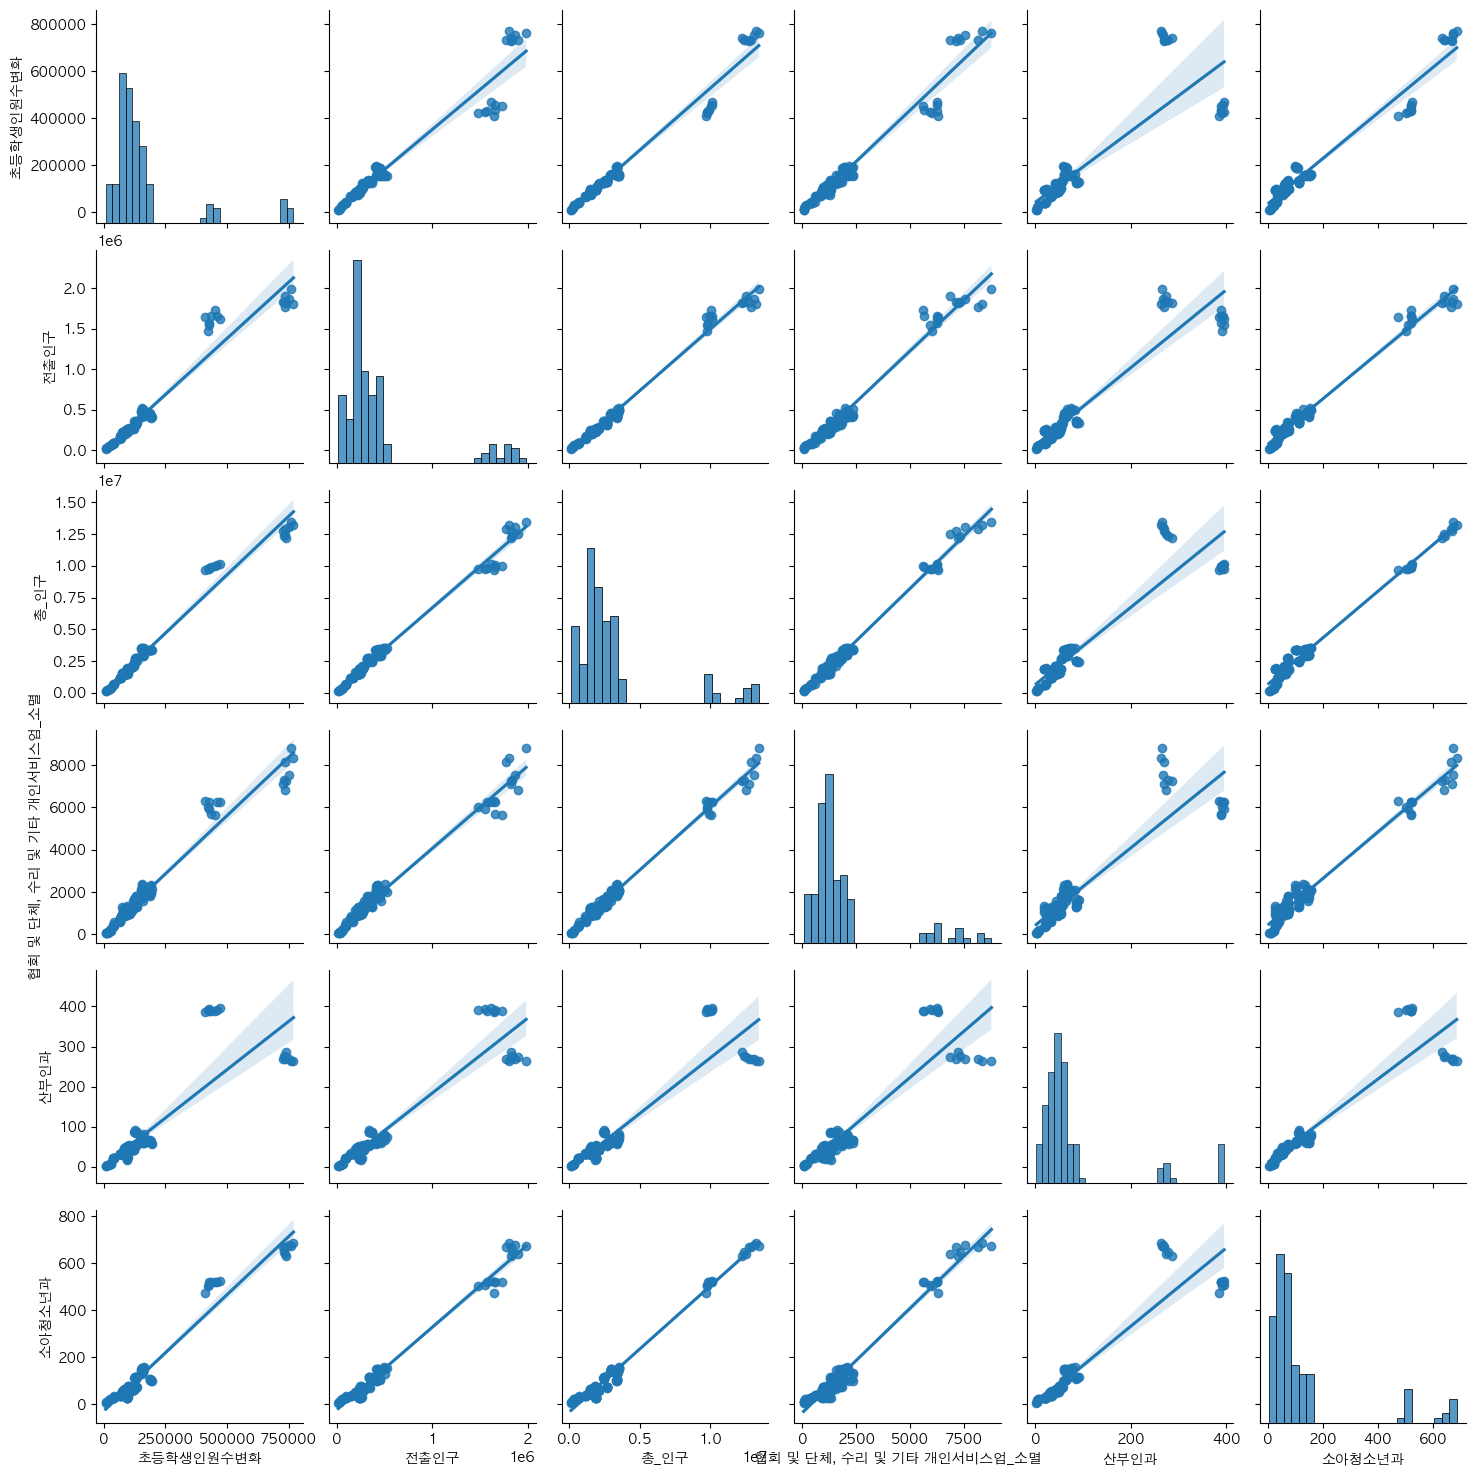

In [311]:
sns.pairplot(
    obtest,
    vars=["초등학생인원수변화","전출인구","총_인구","협회 및 단체, 수리 및 기타 개인서비스업_소멸","산부인과","소아청소년과"],
    kind="reg"
)
plt.show()

In [323]:
tonghab = pd.read_csv("../../Data/02.통합.csv",index_col=0)
tonghab

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,빈집수,"협회 및 단체, 수리 및 기타 개인서비스업 소멸",도매 및 소매업 신생,교육서비스업 소멸,예금은행대출금액,예금액
0,2013,경기도,12234630,1821303,112129,286,739619,NaN,7235,49143,6822,248468.3,13718.5
1,2013,서울특별시,10143645,1620640,84066,395,469392,NaN,6229,48097,4749,462443.1,532689.2
2,2013,경상남도,3333820,423864,29504,65,190166,NaN,1933,12612,1530,57288.6,6703.3
3,2013,부산광역시,3527635,496161,25831,82,160821,NaN,2093,13902,1510,77411.6,59554.5
4,2013,대구광역시,2501588,363224,19340,86,136309,NaN,1301,9981,1188,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,76877.0,1265,6103,591,28669.1,27669.5
132,2020,대전광역시,1463882,243418,7481,44,79807,26983.0,1240,6405,739,39341.3,38725.4
133,2020,강원도,1542840,217897,7835,32,73478,84106.0,1285,5554,683,22831.4,23634.2
134,2020,제주특별자치도,674635,94736,3989,23,40575,35105.0,595,2856,398,20182.3,14025.4


In [329]:
tonghab.drop(columns="빈집수",inplace=True)
tonghab

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,"협회 및 단체, 수리 및 기타 개인서비스업 소멸",도매 및 소매업 신생,교육서비스업 소멸,예금은행대출금액,예금액
0,2013,경기도,12234630,1821303,112129,286,739619,7235,49143,6822,248468.3,13718.5
1,2013,서울특별시,10143645,1620640,84066,395,469392,6229,48097,4749,462443.1,532689.2
2,2013,경상남도,3333820,423864,29504,65,190166,1933,12612,1530,57288.6,6703.3
3,2013,부산광역시,3527635,496161,25831,82,160821,2093,13902,1510,77411.6,59554.5
4,2013,대구광역시,2501588,363224,19340,86,136309,1301,9981,1188,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,1265,6103,591,28669.1,27669.5
132,2020,대전광역시,1463882,243418,7481,44,79807,1240,6405,739,39341.3,38725.4
133,2020,강원도,1542840,217897,7835,32,73478,1285,5554,683,22831.4,23634.2
134,2020,제주특별자치도,674635,94736,3989,23,40575,595,2856,398,20182.3,14025.4


In [332]:
tonghab.iloc[:,2:].columns.values

array(['총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수',
       '협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸',
       '예금은행대출금액', '예금액'], dtype=object)

In [358]:
f_list = ['총인구', '전출인구', '출생아수', '산부인과의원수',
       '협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸',
       '예금은행대출금액', '예금액']
f_list

['총인구',
 '전출인구',
 '출생아수',
 '산부인과의원수',
 '협회 및 단체, 수리 및 기타 개인서비스업 소멸',
 '도매 및 소매업 신생',
 '교육서비스업 소멸',
 '예금은행대출금액',
 '예금액']

In [364]:
f_list_Sum = ['초등학생인원수', '전출인구', '출생아수', '산부인과의원수',
       '협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸',
       '예금은행대출금액']

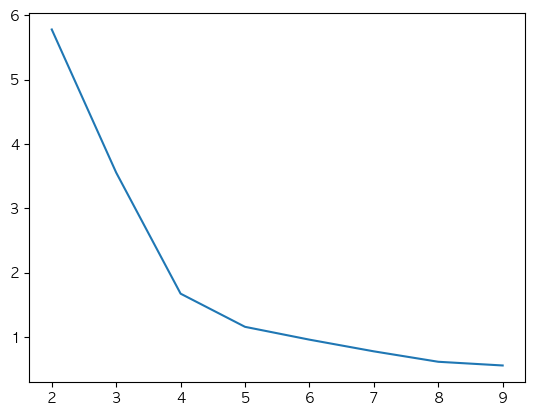

In [365]:
data = tonghab[f_list_Sum]
    # 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)
scores = []
for k in range(2,10):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(data_scale)
    scores.append(km.inertia_)
plt.plot(range(2,10),scores)
plt.show()

In [399]:
f_list_Sum[0]

'초등학생인원수'

In [ ]:
sns.lmplot('초등학생인원수',f_list_Sum[i],
        data=data, fit_reg=False,
        scatter_kws={'s':100},
        hue='cluster_id')

Index(['전출인구', 'cluster_id'], dtype='object')


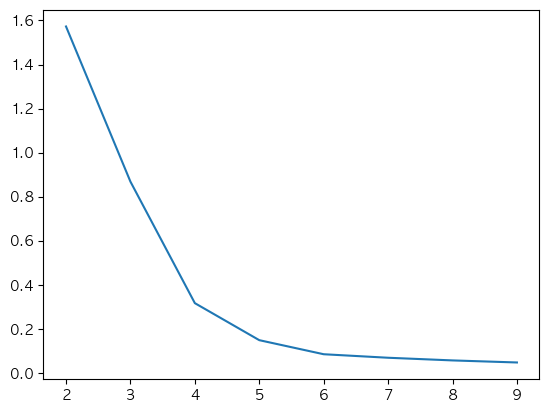

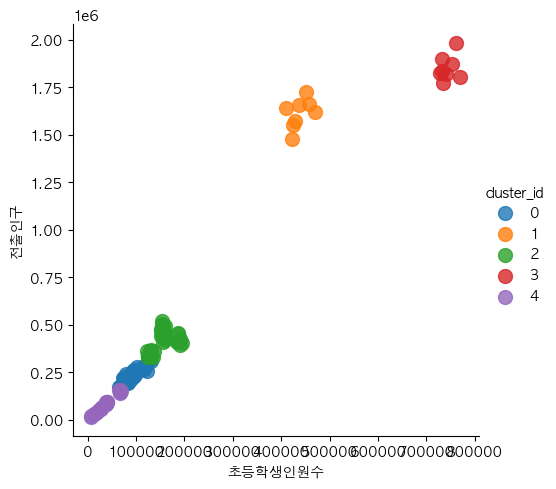

Index(['출생아수', 'cluster_id'], dtype='object')


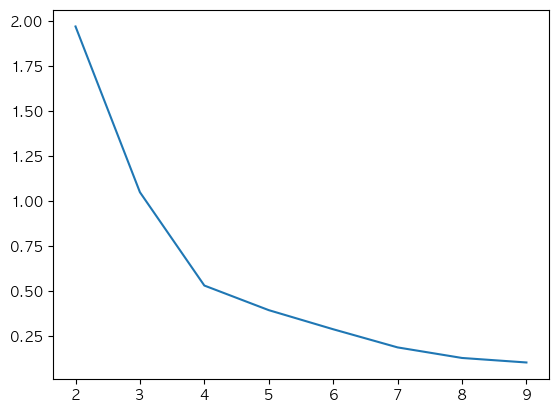

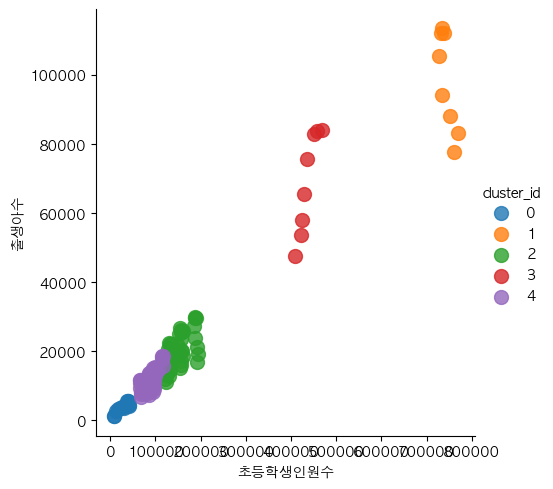

Index(['산부인과의원수', 'cluster_id'], dtype='object')


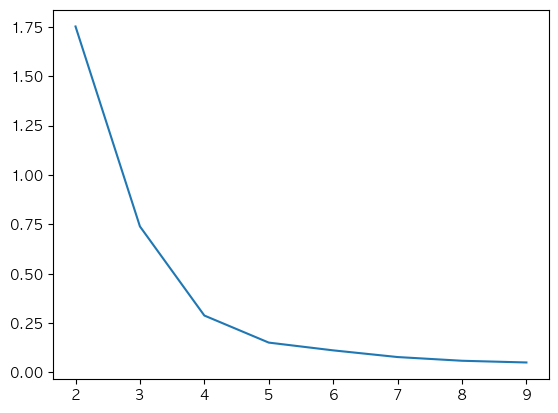

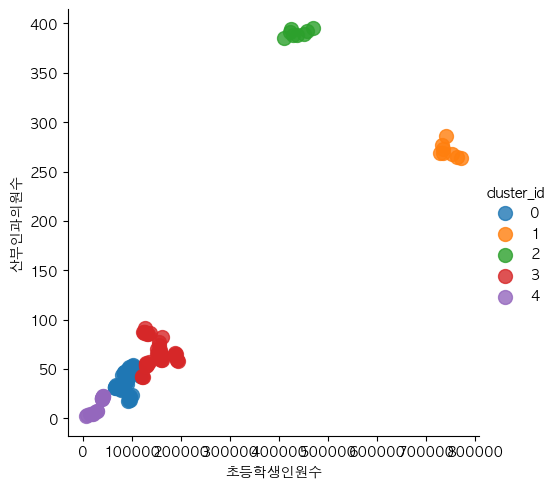

Index(['협회 및 단체, 수리 및 기타 개인서비스업 소멸', 'cluster_id'], dtype='object')


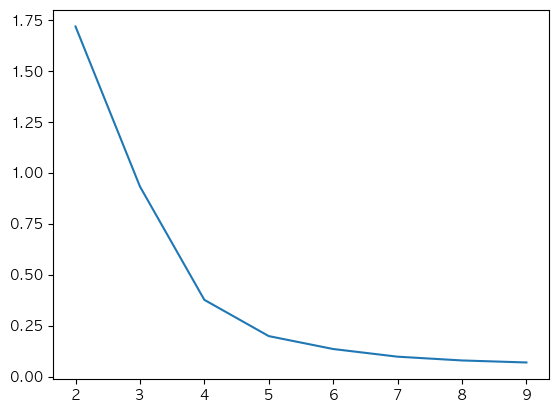

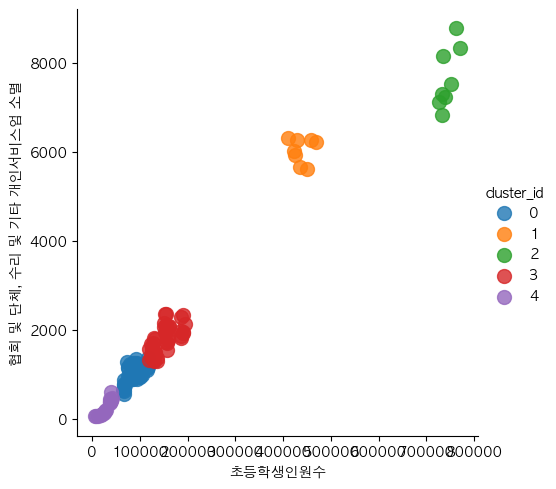

Index(['도매 및 소매업 신생', 'cluster_id'], dtype='object')


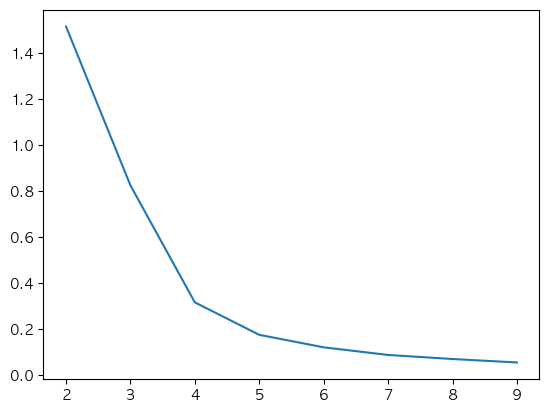

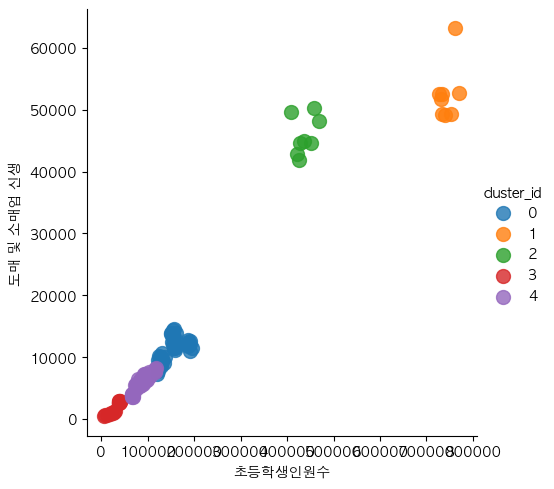

Index(['교육서비스업 소멸', 'cluster_id'], dtype='object')


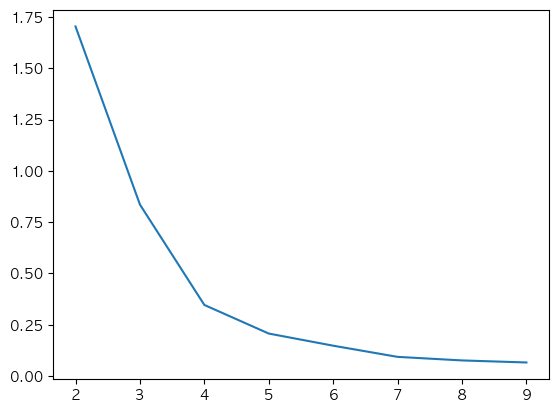

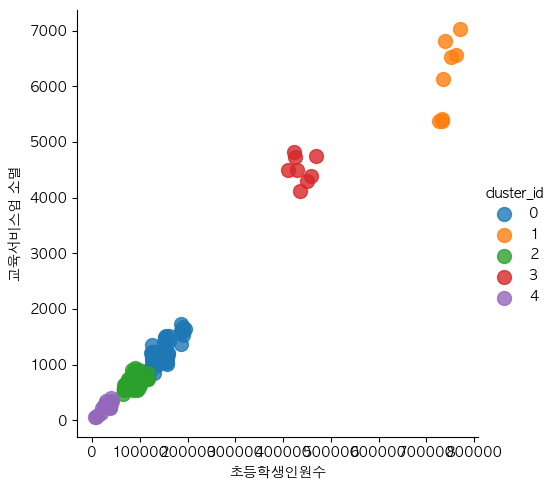

Index(['예금은행대출금액', 'cluster_id'], dtype='object')


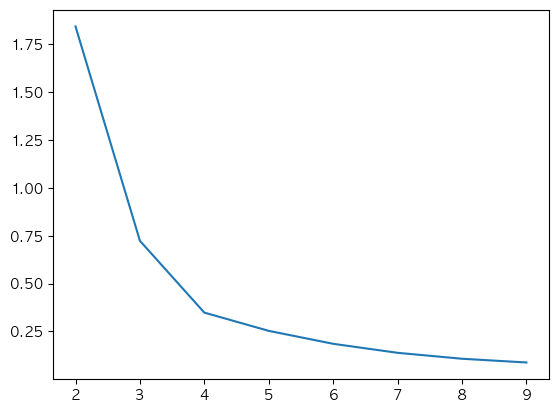

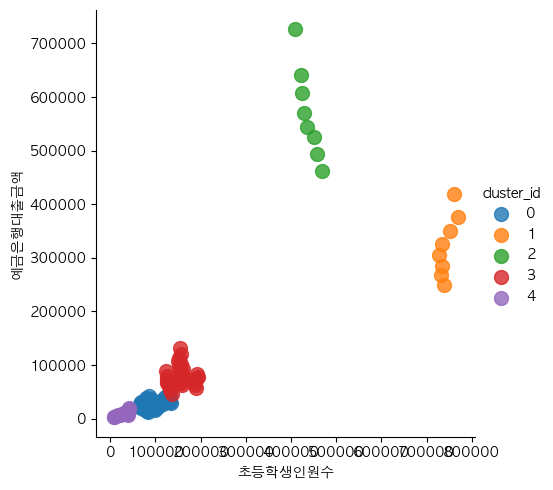

In [400]:
from sklearn.preprocessing import MinMaxScaler
# ["초등학생인원수변화","전출인구","총_인구","협회 및 단체, 수리 및 기타 개인서비스업_소멸","산부인과","소아청소년과"]
# 두 가지 feature를 대상
for i in range(1,len(f_list_Sum)):
    data = tonghab[['초등학생인원수', f_list_Sum[i]]]
    # 정규화 진행
    scaler = MinMaxScaler()
    data_scale = scaler.fit_transform(data)
    scores = []
    for k in range(2,10):
        km = KMeans(n_clusters=k,random_state=42)
        km.fit(data_scale)
        scores.append(km.inertia_)
    kmeans = KMeans(n_clusters=5).fit(data)
    data['cluster_id'] = kmeans.labels_
    print(data.iloc[:,1:].columns)
    # print(km.labels_)
    plt.plot(range(2,10),scores)
    sns.lmplot('초등학생인원수',f_list_Sum[i],
        data=data, fit_reg=False,
        scatter_kws={'s':100},
        hue='cluster_id')
    plt.show()

In [401]:
data

,초등학생인원수,예금은행대출금액,cluster_id
0,739619,248468.3,1
1,469392,462443.1,2
2,190166,57288.6,3
3,160821,77411.6,3
4,136309,46578.5,3
...,...,...,...
131,85135,28669.1,0
132,79807,39341.3,0
133,73478,22831.4,0
134,40575,20182.3,4


In [369]:
tonghab['cluster_id'] = data['cluster_id']
tonghab

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,"협회 및 단체, 수리 및 기타 개인서비스업 소멸",도매 및 소매업 신생,교육서비스업 소멸,예금은행대출금액,예금액,cluster_id
0,2013,경기도,12234630,1821303,112129,286,739619,7235,49143,6822,248468.3,13718.5,2
1,2013,서울특별시,10143645,1620640,84066,395,469392,6229,48097,4749,462443.1,532689.2,1
2,2013,경상남도,3333820,423864,29504,65,190166,1933,12612,1530,57288.6,6703.3,0
3,2013,부산광역시,3527635,496161,25831,82,160821,2093,13902,1510,77411.6,59554.5,0
4,2013,대구광역시,2501588,363224,19340,86,136309,1301,9981,1188,46578.5,37541.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,1265,6103,591,28669.1,27669.5,3
132,2020,대전광역시,1463882,243418,7481,44,79807,1240,6405,739,39341.3,38725.4,3
133,2020,강원도,1542840,217897,7835,32,73478,1285,5554,683,22831.4,23634.2,3
134,2020,제주특별자치도,674635,94736,3989,23,40575,595,2856,398,20182.3,14025.4,3


In [402]:
tonghab.columns

Index(['년도', '시도', '총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수',
       '협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸', '예금은행대출금액',
       'cluster_id'],
      dtype='object')

In [437]:
tonghab23 = tonghab[tonghab["년도"]==2020]

In [448]:
tonghab23.iloc[:,2:11].columns
listK = ['총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수',
       '협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸', '예금은행대출금액']
       

In [453]:
listK[8]

'예금은행대출금액'

In [455]:
len(tonghab23.iloc[:,2:11].columns)

9

In [463]:
tonghab23.set_index("시도",inplace=True)

In [467]:
tonghab23[listK[1]]

시도
경기도        1984199
서울특별시      1642977
경상남도        419997
부산광역시       506176
대구광역시       364083
인천광역시       460304
전라북도        257577
경상북도        334679
광주광역시       232246
충청남도        286386
전라남도        248770
울산광역시       149696
충청북도        226441
대전광역시       243418
강원도         217897
제주특별자치도      94736
세종특별자치시      65909
Name: 전출인구, dtype: int64

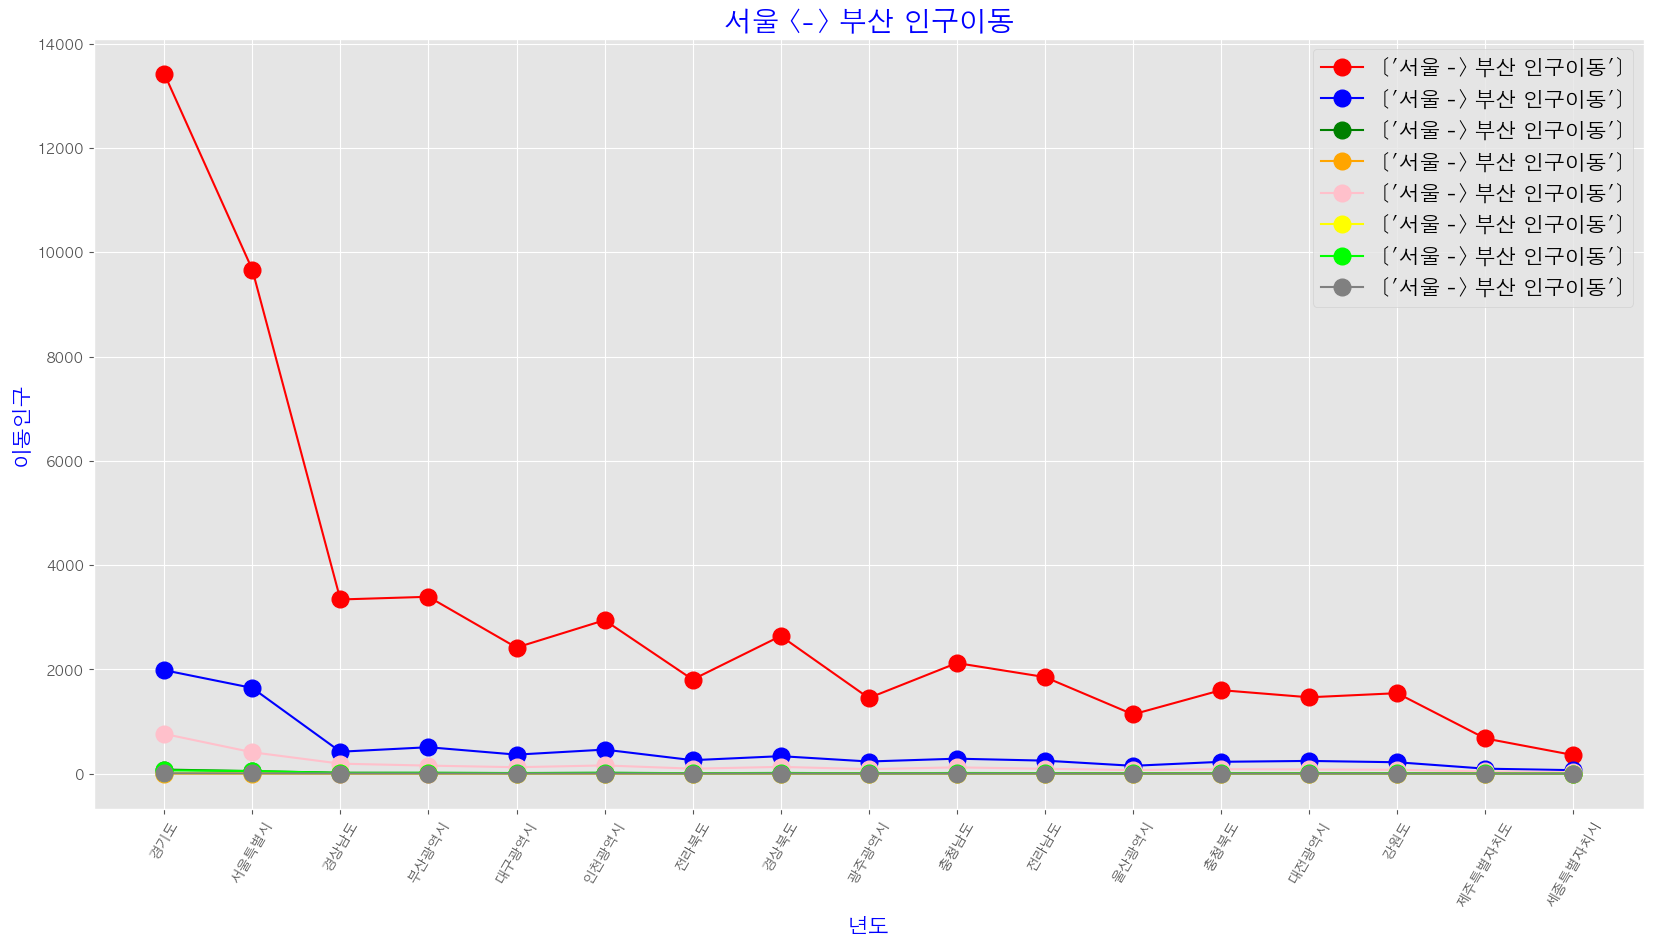

In [472]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
# ax =fig.add_subplot(1,1,1)
cor = ["red","blue","green","orange","pink","yellow","lime","gray","lightblue"]
# 그래프 객체 생성
# fig = plt.figure(figsize=(10,10)) # instance
for i in range(8):
    plt.plot(tonghab23[listK[i]]/1000, marker='o', markersize=12, label=['서울 -> 부산 인구이동'], color=cor[i])

# plt.ylim(10000,tonghab['전출인구'].max()+1000)
plt.xticks(rotation=60)
plt.title('서울 <-> 부산 인구이동',size=20, color='blue')
plt.legend(loc = 'best', fontsize= 15)
# plt.legend(labels=['서울 <- 부산 인구이동'], loc = 'best', fontsize= 15)
plt.xlabel("년도",size=15,color='blue')
plt.ylabel("이동인구",size=15,color='blue')
plt.show()

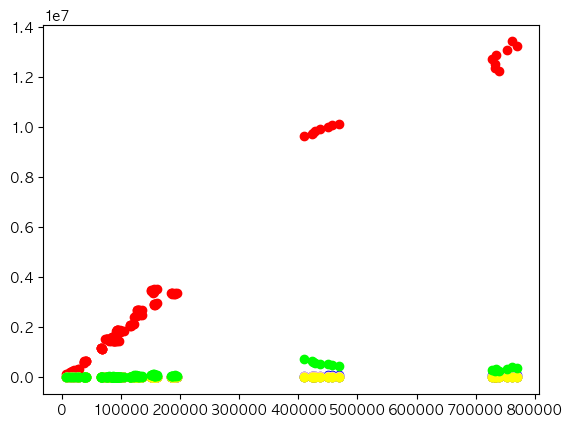

In [432]:
# plt.ylim(0,1000000)
cor = ["red","blue","green","orange","pink","yellow","lime"]
plt.scatter(tonghab["초등학생인원수"],tonghab['총인구'],color=cor[0])
plt.scatter(tonghab["초등학생인원수"],tonghab['출생아수'],color=cor[1])
plt.scatter(tonghab["초등학생인원수"],tonghab['산부인과의원수'],color=cor[2])
plt.scatter(tonghab["초등학생인원수"],tonghab["협회 및 단체, 수리 및 기타 개인서비스업 소멸"],color=cor[3])
plt.scatter(tonghab["초등학생인원수"],tonghab["도매 및 소매업 신생"],color=cor[4])
plt.scatter(tonghab["초등학생인원수"],tonghab["교육서비스업 소멸"],color=cor[5])
plt.scatter(tonghab["초등학생인원수"],tonghab['예금은행대출금액'],color=cor[6])

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(tonghab.label, tonghab.cluster_id)

In [235]:
# 머신러닝 모듈
# sklearn의 preprocessing기능을 사용하면 최대값과 최소값을 비교하면서 정규화가 진행된다
from sklearn import preprocessing

# 최대값과 최소값 가져오기 instance
min_max_scaler = preprocessing.MinMaxScaler()

In [236]:
x = school_plus[["초등학교수","초등학생인원수변화"]].values

In [237]:
x_scaler= min_max_scaler.fit_transform(x.astype(float))
x_scaler
## array([0~1 사이 숫자])

array([[1.        , 0.96049978],
       [0.49356223, 0.60617528],
       [0.40429185, 0.24005119],
       [0.24034335, 0.20157371],
       [0.16909871, 0.16943332],
       [0.18712446, 0.19776727],
       [0.33648069, 0.12855764],
       [0.39055794, 0.1680277 ],
       [0.10901288, 0.11665185],
       [0.32961373, 0.14308717],
       [0.34678112, 0.12078347],
       [0.08240343, 0.07875918],
       [0.20343348, 0.10721769],
       [0.10386266, 0.11316796],
       [0.28240343, 0.09977919],
       [0.07553648, 0.04083765],
       [0.        , 0.        ],
       [1.        , 0.95091221],
       [0.49356223, 0.59060465],
       [0.40429185, 0.23586449],
       [0.24034335, 0.19492981],
       [0.16909871, 0.16347518],
       [0.18712446, 0.19622266],
       [0.33648069, 0.12426343],
       [0.39055794, 0.16287465],
       [0.10901288, 0.11285983],
       [0.32961373, 0.14156616],
       [0.34678112, 0.11621259],
       [0.08240343, 0.07699429],
       [0.20343348, 0.10413372],
       [0.

In [238]:
# 정규화된 범죄건수가 있는 데이터프레임 생성
study_df = pd.DataFrame(x_scaler, columns=[["초등학교수","초등학생인원수변화"]], index=school_plus.index)
study_df

,초등학교수,초등학생인원수변화
0,1.000000,0.960500
1,0.493562,0.606175
2,0.404292,0.240051
3,0.240343,0.201574
4,0.169099,0.169433
...,...,...
131,0.203433,0.102333
132,0.103863,0.095347
133,0.282403,0.087049
134,0.075536,0.043906


In [371]:
tonghab.drop(columns="예금액",inplace=True)

In [372]:
tonghab.columns

Index(['년도', '시도', '총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수',
       '협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸', '예금은행대출금액',
       'cluster_id'],
      dtype='object')

In [374]:
tonghab.loc[:,"총인구":"예금은행대출금액"].columns

Index(['총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수',
       '협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸', '예금은행대출금액'],
      dtype='object')

---
### 로지스틱 회귀로 클러스터 값 예측률 찍어보자

In [375]:
# Feature
study_input = tonghab[tonghab.loc[:,"총인구":"예금은행대출금액"].columns].to_numpy()
study_input[:5]

array([[1.2234630e+07, 1.8213030e+06, 1.1212900e+05, 2.8600000e+02,
        7.3961900e+05, 7.2350000e+03, 4.9143000e+04, 6.8220000e+03,
        2.4846830e+05],
       [1.0143645e+07, 1.6206400e+06, 8.4066000e+04, 3.9500000e+02,
        4.6939200e+05, 6.2290000e+03, 4.8097000e+04, 4.7490000e+03,
        4.6244310e+05],
       [3.3338200e+06, 4.2386400e+05, 2.9504000e+04, 6.5000000e+01,
        1.9016600e+05, 1.9330000e+03, 1.2612000e+04, 1.5300000e+03,
        5.7288600e+04],
       [3.5276350e+06, 4.9616100e+05, 2.5831000e+04, 8.2000000e+01,
        1.6082100e+05, 2.0930000e+03, 1.3902000e+04, 1.5100000e+03,
        7.7411600e+04],
       [2.5015880e+06, 3.6322400e+05, 1.9340000e+04, 8.6000000e+01,
        1.3630900e+05, 1.3010000e+03, 9.9810000e+03, 1.1880000e+03,
        4.6578500e+04]])

In [376]:
# Target
study_target = tonghab['cluster_id'].to_numpy()
study_target

array([2, 1, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 1, 0, 0, 0,
       0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 1, 0, 0, 0, 0, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 2, 1, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 2, 1, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 1, 0,
       0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 4, 2, 1, 0, 0, 0, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 4, 2, 1, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3,
       3, 3, 3, 4], dtype=int32)

In [377]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =\
    train_test_split(study_input,study_target,random_state=42)

# 표준화 

In [378]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

---
### KNN을 이용한 확률 예측

In [379]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_scaled,train_target)
print("Train Score : ", knn.score(train_scaled,train_target))
print("Test Score : ", knn.score(test_scaled,test_target))

Train Score :  0.9901960784313726
Test Score :  0.9411764705882353


In [380]:
# test의 확률예측 값보기
import numpy as np
proba = knn.predict_proba(test_scaled[:5])
np.round(proba,decimals=4) # 소수점 이하 4자리

array([[1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0.2, 0. , 0. , 0.8, 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0.2, 0. , 0. , 0.8, 0. ]])

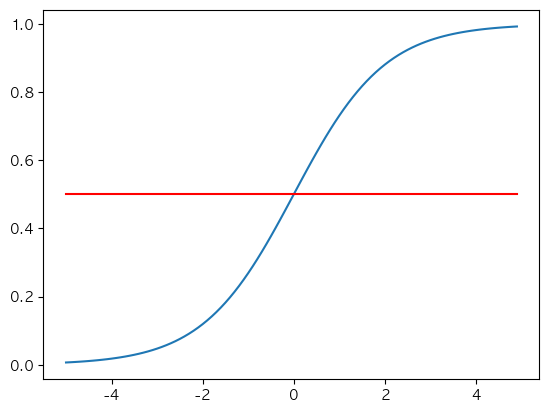

In [381]:
# Sigmoid Graph 출력해 보기
import matplotlib.pyplot as plt

z=np.arange(-5,5,0.1)
y=np.full((100,1),0.5) # 양성과 음성의 기준점
phi=1/(1+np.exp(-z))

plt.plot(z,phi)
plt.plot(z,y,c='red')

plt.show()

---
### 로지스틱 회귀로 다중 분류 수행하기

In [392]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled,train_target)
print("Train :", lr.score(train_scaled,train_target))
print("Test :", lr.score(test_scaled,test_target))

Train : 0.9901960784313726
Test : 0.9411764705882353


---
### 확률 분포 검증

In [383]:
# test data로 확률
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.996, 0.001, 0.001, 0.003, 0.   ],
       [0.001, 0.   , 0.   , 0.972, 0.027],
       [0.227, 0.   , 0.   , 0.772, 0.   ],
       [0.019, 0.   , 0.   , 0.98 , 0.001],
       [0.405, 0.   , 0.   , 0.595, 0.   ]])

In [384]:
decisions = lr.decision_function(test_scaled[:5])
np.round(decisions, decimals=2)

array([[  7.9 ,   0.88,   0.7 ,   2.  , -11.47],
       [  1.43,  -6.44,  -7.52,   8.07,   4.47],
       [  4.3 ,  -3.35,  -3.75,   5.52,  -2.72],
       [  2.96,  -4.74,  -5.47,   6.92,   0.33],
       [  4.85,  -3.01,  -3.19,   5.23,  -3.89]])

In [385]:
from scipy.special import softmax
proba = softmax(decisions, axis=1)
np.round(proba, decimals=3)

array([[0.996, 0.001, 0.001, 0.003, 0.   ],
       [0.001, 0.   , 0.   , 0.972, 0.027],
       [0.227, 0.   , 0.   , 0.772, 0.   ],
       [0.019, 0.   , 0.   , 0.98 , 0.001],
       [0.405, 0.   , 0.   , 0.595, 0.   ]])

In [386]:
test_target[:5]

array([0, 3, 3, 3, 0], dtype=int32)

In [387]:
lr.classes_

array([0, 1, 2, 3, 4], dtype=int32)